<a href="https://colab.research.google.com/github/iamlittleAnt/VEF_DA_FinalProjects/blob/master/Final_Project_HousePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I. Explore Data Analyst

##1.  LIBARARIES, PACKAGES & READING FILE



###1.1 LIBARARIES, PACKAGES

In [0]:
# Set library & loading packages
import pandas as pd
import numpy as np


from os import path #visualization with word clound
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew, probplot, boxcox # for some stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor, plot_importance

#import packages for dictionary
import os, math, subprocess

import warnings
def ignore_warn(*args, **kwargs):
  pass 
  warnings.warn = ignore_warn #ignore annoying warning (from sklearn & seaborn)

### 1.2 READING FILE

In [0]:
# Upload file 
!wget https://raw.githubusercontent.com/Shitao-zz/Kaggle-House-Prices-Advanced-Regression-Techniques/master/input/train.csv

--2020-03-15 05:55:07--  https://raw.githubusercontent.com/Shitao-zz/Kaggle-House-Prices-Advanced-Regression-Techniques/master/input/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 449.88K  --.-KB/s    in 0.06s   

2020-03-15 05:55:07 (7.10 MB/s) - ‘train.csv’ saved [460676/460676]



In [0]:
# Read file
df = pd.read_csv('train.csv')
print(df.shape)
df.shape
print('Total records:',df.shape[0])
print('Total columns:',df.shape[1])
df.describe()

(1460, 81)
Total records: 1460
Total columns: 81


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
!wget https://github.com/raoulbia/kaggle-house-prices/blob/master/data/house-price-test.csv

--2020-03-15 05:48:32--  https://github.com/raoulbia/kaggle-house-prices/blob/master/data/house-price-test.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘house-price-test.csv.3’

house-price-test.cs     [ <=>                ]   3.26M  --.-KB/s    in 0.1s    

2020-03-15 05:48:33 (31.6 MB/s) - ‘house-price-test.csv.3’ saved [3423717]



##2. DATA DICTIONARY

Understading data: check missing & distinct value in each columns, rows and some stats

In [0]:
def exploring_stats(df_input):
    total_rows = df_input.shape[0]
    total_columns = df_input.shape[1]
    # check data type
    name = []
    sub_type = []
    for n, t in df_input.dtypes.iteritems():
        name.append(n)
        sub_type.append(t)

    # check distinct
    # cname is column name
    check_ndist = []
    for cname in df_input.columns:
        ndist = df_input[cname].nunique()
        pct_dist = ndist * 100.0 / total_rows
        check_ndist.append("{} ({:0.2f}%)".format(ndist, pct_dist))
    # check missing
    check_miss = []
    for cname in df_input.columns:
        nmiss = df_input[cname].isnull().sum()
        pct_miss = nmiss * 100.0 / total_rows
        check_miss.append("{} ({:0.2f}%)".format(nmiss, pct_miss))
    # check zeros
    check_zeros = []  #check 
    for cname in df_input.columns:
        try:
            nzeros = (df_input[cname] == 0).sum()
            pct_zeros = nzeros * 100.0 / total_rows
            check_zeros.append("{} ({:0.2f}%)".format(nzeros, pct_zeros))
        except:
            check_zeros.append("{} ({:0.2f}%)".format(0, 0))
            continue
    # check negative
    check_negative = []
    for cname in df_input.columns:
        try:
            nneg = (df_input[cname].astype("float") < 0).sum()
            pct_neg = nneg * 100.0 / total_rows
            check_negative.append("{} ({:0.2f}%)".format(nneg, pct_neg))
        except:
            check_negative.append("{} ({:0.2f}%)".format(0, 0))
            continue
    data = {"column_name": name, "data_type": sub_type, "n_distinct": check_ndist, "n_miss": check_miss, "n_zeros": check_zeros,
            "n_negative": check_negative, }
    # check stats
    df_stats = df_input.describe().transpose()
    check_stats = []
    for stat in df_stats.columns:
        data[stat] = []
        for cname in df_input.columns:
            try:
                data[stat].append(df_stats.loc[cname, stat])
            except:
                data[stat].append(0.0)
    # col_ordered = ["name", "sub_type", "n_distinct", "n_miss", "n_negative", "n_zeros",
    #                "25%", "50%", "75%", "count", "max", "mean", "min", "std"]  # + list(pdf_sample.columns)
    df_data = pd.DataFrame(data)
    # df_data = pd.concat([df_data, df_sample], axis=1)
    # df_data = df_data[col_ordered]
    return df_data

In [0]:
# Dictionary of Dataframe:
exploring_stats(df)

,column_name,data_type,n_distinct,n_miss,n_zeros,n_negative,count,mean,std,min,25%,50%,75%,max
0,Id,int64,1460 (100.00%),0 (0.00%),0 (0.00%),0 (0.00%),1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
1,MSSubClass,int64,15 (1.03%),0 (0.00%),0 (0.00%),0 (0.00%),1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
2,MSZoning,object,5 (0.34%),0 (0.00%),0 (0.00%),0 (0.00%),0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
3,LotFrontage,float64,110 (7.53%),259 (17.74%),0 (0.00%),0 (0.00%),1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
4,LotArea,int64,1073 (73.49%),0 (0.00%),0 (0.00%),0 (0.00%),1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,MoSold,int64,12 (0.82%),0 (0.00%),0 (0.00%),0 (0.00%),1460.0,6.321918,2.703626,1.0,5.00,6.0,8.00,12.0
77,YrSold,int64,5 (0.34%),0 (0.00%),0 (0.00%),0 (0.00%),1460.0,2007.815753,1.328095,2006.0,2007.00,2008.0,2009.00,2010.0
78,SaleType,object,9 (0.62%),0 (0.00%),0 (0.00%),0 (0.00%),0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
79,SaleCondition,object,6 (0.41%),0 (0.00%),0 (0.00%),0 (0.00%),0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


### Results:
1. There are 17 variables missed value. Numerical variables are 3 parameters, others are categorical
2. With numerical variables, LotFrontage, GarageYrBlt and MasVnrArea fill mean values.
3.  With categorical variables, these parameters will fill Na by NO ***

In [0]:
# Drop filed 'Id' which is not useful for model
df = df.drop(columns=['Id'])

##3. SOLVE MISSING VALUES

###3.1 Categorical Variable:

How many categorical variables missing values?


In [0]:
# Caculate missing categorical variables
print(df.select_dtypes(include=['object']).shape[1])
df.select_dtypes(include=['object']).describe()

43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [0]:
# Fill wrong values of categorical Variables:
df['Alley'].fillna('No Alley',inplace=True)
# Fill other variables
mode_Mastype = df['MasVnrType'].mode()
df['MasVnrType'].fillna(mode_Mastype,inplace=True)# because mode of the variables is None, Missing values are None and also MasVnrArea Values equal 0
df['BsmtQual'].fillna('No Basement',inplace=True)
df['BsmtCond'].fillna('No Basement',inplace=True)
df['BsmtExposure'].fillna('No Basement',inplace=True)
df['BsmtFinType1'].fillna('No Basement',inplace=True)
df['BsmtFinType2'].fillna('No Basement',inplace=True)
df['FireplaceQu'].fillna('No Fireplace',inplace=True)
df['GarageFinish'].fillna('No Garage',inplace=True)
df['GarageQual'].fillna('No Garage',inplace=True)
df['GarageType'].fillna('No Garage',inplace=True) # if houses are not garage, GarageYrBlt inserts 0 number
df['GarageCond'].fillna('No Garage',inplace=True)
df['PoolQC'].fillna('No Pool',inplace=True)
df['Fence'].fillna('No Fence',inplace=True)
# Show a new dataframe
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,NaN,0,12,2008,WD,Normal,250000


In [0]:
# Count missing values of categorical Variables again:
df.select_dtypes(include=['object']).isnull().sum()

MSZoning            0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinType2        0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu         0
GarageType          0
GarageFinish        0
GarageQual          0
GarageCond          0
PavedDrive          0
PoolQC              0
Fence               0
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [0]:
# Count rest of missing values:
df_na = (df.isnull().sum() / len(df))*100
df_na = df_na.drop(df_na[df_na==0].index).sort_values(ascending=False)[:10]
missing_data = pd.DataFrame({'missing rate': df_na})
missing_data.head(10)

,missing rate
MiscFeature,96.301370
LotFrontage,17.739726
GarageYrBlt,5.547945
MasVnrArea,0.547945
MasVnrType,0.547945
Electrical,0.068493


###3.2 Numerical Values:

In [0]:
# Show numerical:
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [0]:
# LotFrontage:
mean_Lot = df['LotFrontage'].mean()
df['LotFrontage'].fillna(mean_Lot,inplace=True)
# MasVnrArea: explained upper
df['MasVnrArea'].fillna(df['MasVnrArea']==0, inplace=True)
df['MasVnrArea'].value_counts()
# GarageYrBlt: explained upper
df['GarageYrBlt'].fillna(df['GarageYrBlt']==0,inplace=True)
# Electrical: 
mode_El = df['Electrical'].mode()
df['Electrical'].fillna('SBrkr',inplace=True)
# MiscFeauture:
df['MiscFeature'].fillna('No Features',inplace=True)

In [0]:
# A new dataframe:
df.select_dtypes(include=['object','float','int']).isnull().sum()
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No Features,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No Features,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,No Features,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,No Features,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,No Features,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No Pool,No Fence,No Features,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,No Pool,MnPrv,No Features,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1St

In [0]:
# Change yr to age:
def AgeYears(feature): 
    return feature.apply(lambda x: 0 if x==0 else (2020 - x))
df.YearBuilt = AgeYears(df.YearBuilt)
df.YearRemodAdd = AgeYears(df.YearRemodAdd)
df.GarageYrBlt = AgeYears(df.GarageYrBlt) 
df.YrSold =  AgeYears(df.YrSold)


##4. VISUALIZATION:

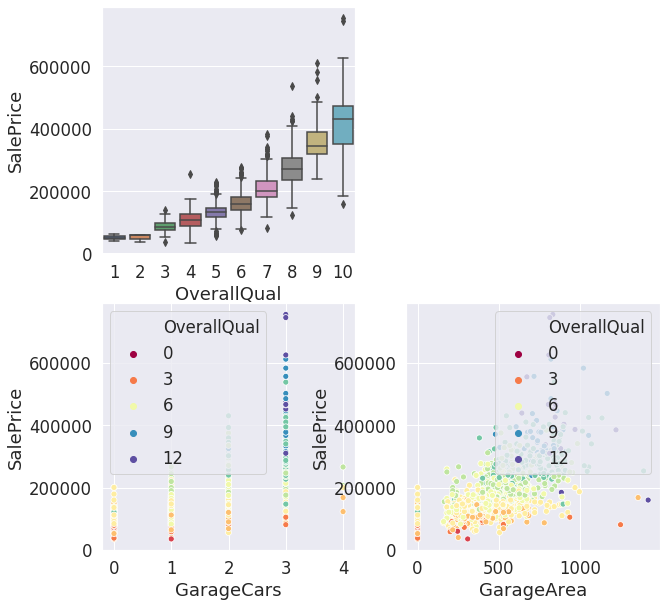

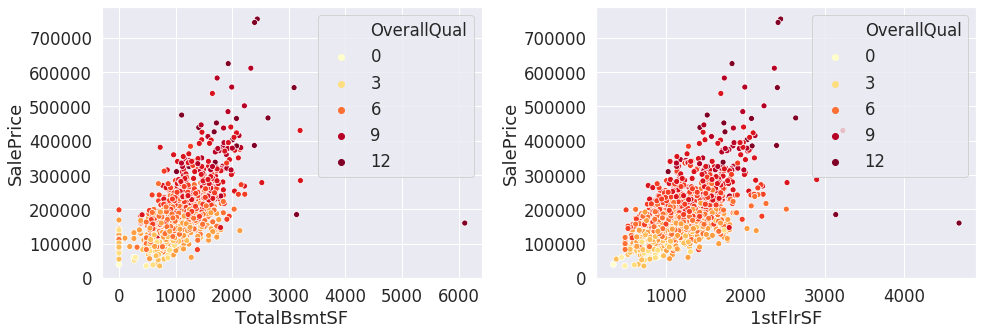

In [0]:
# Show relationship OverallQual/SalePrice:
fig = plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

#  Box plot overallqual/salePrice
fig1 = fig.add_subplot(221); sns.boxplot(x='OverallQual', y='SalePrice', data=df[['SalePrice', 'OverallQual']])

# GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = df.GarageCars, y = df.SalePrice, hue=df.OverallQual, palette= 'Spectral')

# GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = df.GarageArea, y = df.SalePrice, hue=df.OverallQual, palette= 'Spectral')

fig5 = plt.figure(figsize=(14, 5))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(y = df.SalePrice , x = df.TotalBsmtSF, hue=df.OverallQual, palette= 'YlOrRd')

fig7 = fig5.add_subplot(122); 
sns.scatterplot(y = df.SalePrice, x = df['1stFlrSF'], hue=df.OverallQual, palette= 'YlOrRd')

plt.tight_layout(); plt.show()

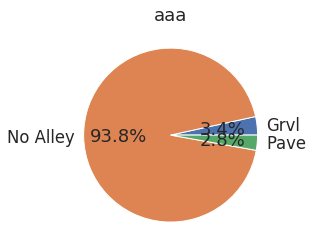

In [0]:
# Pie Chart of categorical variables:
Alley_pie = df.groupby('Alley').size()
labels = Alley_pie.keys()
plt.pie(Alley_pie, labels=labels, autopct='%1.1f%%')
plt.title('aaa')
plt.show()

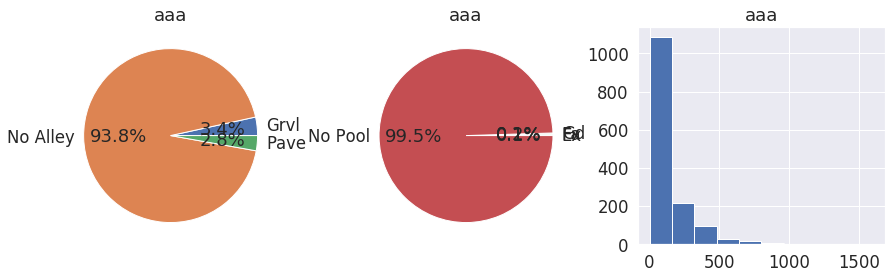

In [0]:
# Compare other chart:
Alley_pie = df.groupby('Alley').size()
Pool_pie = df.groupby('PoolQC').size()
alley_labels = Alley_pie.keys()
pool_labels = Pool_pie.keys()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 4)) #nrow * ncols in image
axes[0].pie(Alley_pie, labels=alley_labels, autopct='%1.1f%%')
axes[0].set_title('aaa')

axes[1].pie(Pool_pie, labels=pool_labels, autopct='%1.1f%%')
axes[1].set_title('aaa')

axes[2].hist(df['MasVnrArea'])
axes[2].set_title('aaa')
plt.show()


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice distribution')

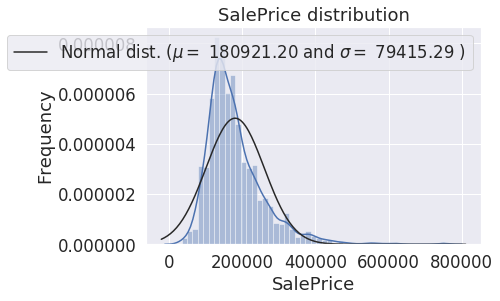

In [0]:
# Distribution of SalePrice:
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

(array([1.085e+03, 2.190e+02, 9.400e+01, 2.900e+01, 1.900e+01, 6.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([0.0, 160.0, 320.0, 480.0, 640.0, 800.0, 960.0, 1120.0, 1280.0,
        1440.0, 1600.0], dtype=object),
 <a list of 10 Patch objects>)

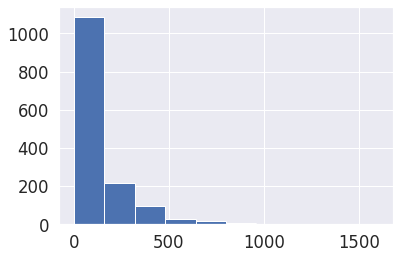

In [0]:
# Histogram of MSsubclasss
plt.hist(df['MasVnrArea'])

In [0]:
# Stat of Pool:
pool = df['PoolQC']
pool.head()
pool.value_counts()
pool_stat = df.groupby('PoolQC') #make comparisons between groups of a feature
pool_stat.describe().head()

MSSubClass                        ... SalePrice                    
             count       mean        std  ...       50%       75%       max
PoolQC                                    ...                              
Ex             2.0  67.500000  10.606602  ...  490000.0  617500.0  745000.0
Fa             2.0  40.000000  28.284271  ...  215500.0  232750.0  250000.0
Gd             3.0  73.333333  11.547005  ...  171000.0  222985.0  274970.0
No Pool     1453.0  56.871989  42.379778  ...  162900.0  213500.0  755000.0

[4 rows x 288 columns]

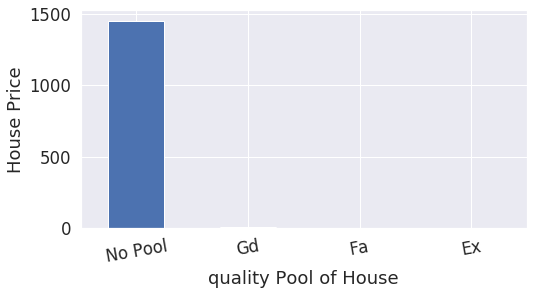

In [0]:
# Relationship between PoolQC & SalePrice:
#Bar chart Pool
plt.figure(figsize=(8,4))
pool_stat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=10)
plt.xlabel("quality Pool of House")
plt.ylabel("House Price")
plt.show()

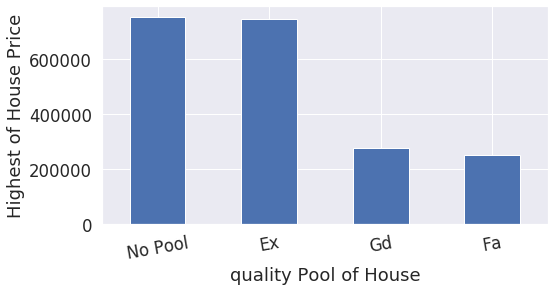

In [0]:
# Bar pool follow by highest SalePrice
plt.figure(figsize=(8,4))
pool_stat.max().sort_values(by="SalePrice",ascending=False)["SalePrice"].plot.bar()
plt.xticks(rotation=10)
plt.xlabel("quality Pool of House")
plt.ylabel("Highest of House Price")
plt.show()

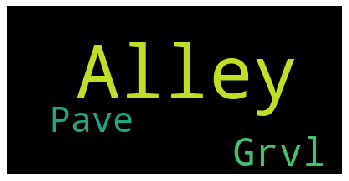

In [0]:
#Try to draw with wordcloud
#Start with one review
text = ' '.join(df.Alley.values.tolist())
# Create & generate a word cloud image:
wordcloud = WordCloud().generate(text)
#Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Part II. SELECT PARAMETERS 

##1. CORRELATION OF VARIABLES:

### 1.1 Numerical Variables:

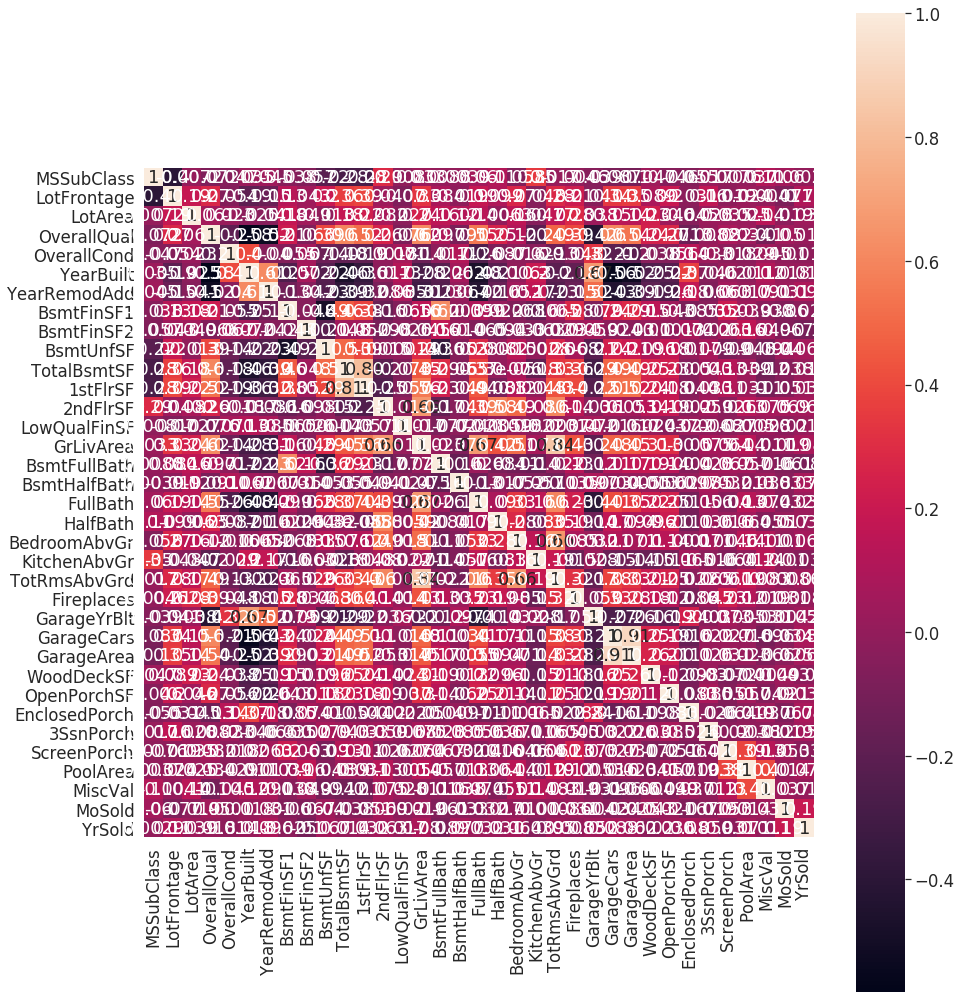

In [0]:
# Calculate the Correlation matrix of data frame without Dependent variable (Just on 25% of data)
corr_matrix = df.drop(columns=['SalePrice'])._get_numeric_data().sample(frac=0.25).corr()
# Plot the heatmap of Correlation
f, ax = plt.subplots(figsize=(15, 18))
sns.heatmap(corr_matrix, vmax=1, annot=True, square=True);
plt.show()

In [0]:
# Create correlation matrix
corr_matrix = corr_matrix.abs()
corr_matrix
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9
to_drop_corr = [column for column in upper.columns if any(upper[column] >= 0.9)]
print(to_drop_corr)

['GarageArea']


In [0]:
corr_SalePrice = df._get_numeric_data().sample(frac=0.25).corr()

In [0]:
upper_SP = corr_SalePrice.where(np.triu(np.ones(corr_SalePrice.shape), k=1).astype(np.bool))
max_corr = [column for column in upper_SP.columns if any(upper_SP[column] >= 0.7)]
print(max_corr)


['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']


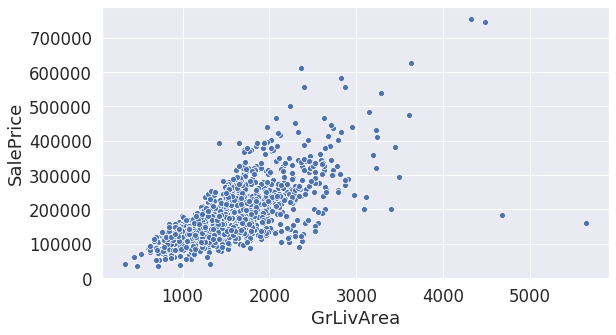

In [0]:
# Relationship GrLivArea & SalePrice
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
sns.scatterplot(x = df.GrLivArea, y = df.SalePrice, ax = ax)

In [0]:
#Deleting outliers
df = df.drop(df[(df.GrLivArea>4000) & (df.SalePrice<300000)].index)


In [0]:
#Check the graphic again
ax = fig.add_subplot(122)
sns.scatterplot(x =df.GrLivArea, y = df.SalePrice, ax = ax)
plt.show()

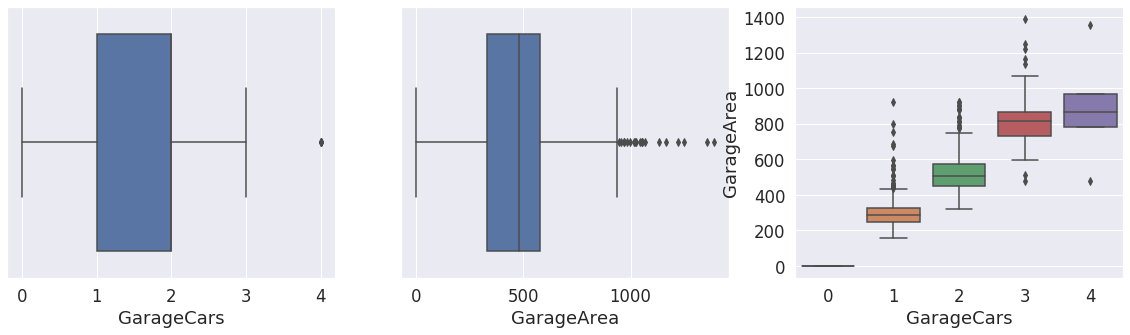

In [0]:
# Garage & Parking:
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(131); sns.boxplot(df.GarageCars)
fig2 = fig.add_subplot(132); sns.boxplot(df.GarageArea)
fig3 = fig.add_subplot(133); sns.boxplot(df.GarageCars, df.GarageArea)
plt.show()

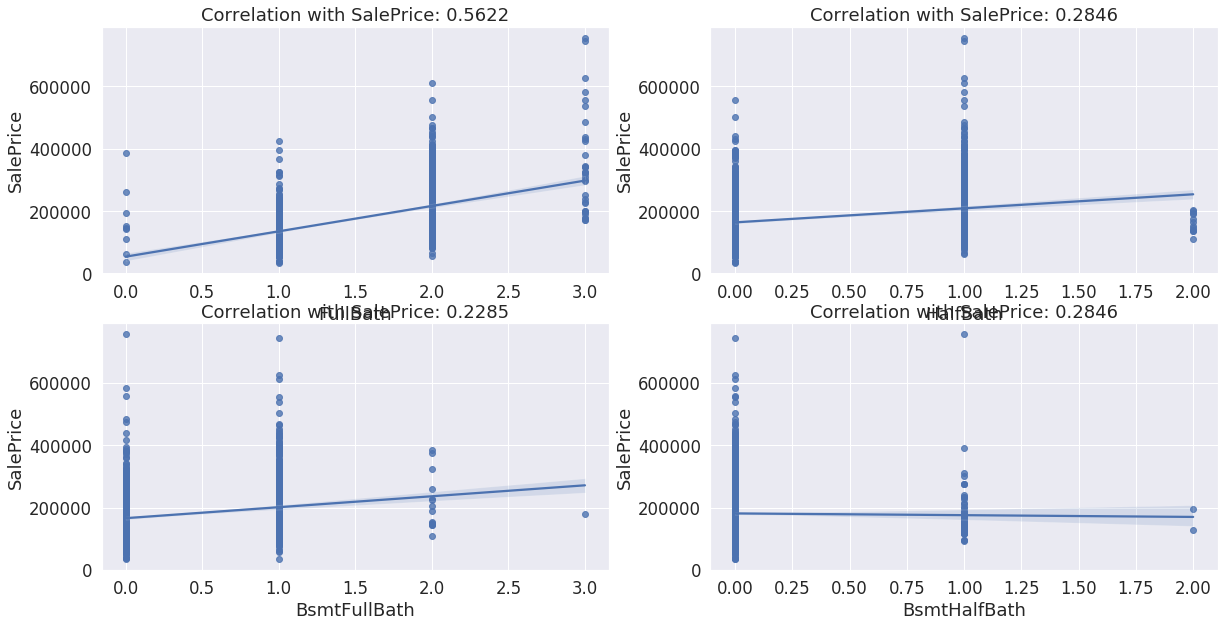

In [0]:
# Bathrooms Features:
fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(221); sns.regplot(x='FullBath', y='SalePrice', data = df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.FullBath.corr(df['SalePrice'])))

fig2 = fig.add_subplot(222); sns.regplot(x='HalfBath', y='SalePrice', data=df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.HalfBath.corr(df['SalePrice'])))

fig3 = fig.add_subplot(223); sns.regplot(x='BsmtFullBath', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.BsmtFullBath.corr(df['SalePrice'])))

fig4 = fig.add_subplot(224); sns.regplot(x='BsmtHalfBath', y='SalePrice', data=df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.HalfBath.corr(df['SalePrice'])))

plt.show()

In [0]:
# Most Feature Importance
#print("Find most important features relative to target")
corr1 = df.corr()
corr1.sort_values(['SalePrice'], ascending=False, inplace=True)
corr1.SalePrice

feature_selection = corr1.SalePrice.head(20)
feature_selection.drop('SalePrice')
feature_selection

SalePrice       1.000000
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
Fireplaces      0.469862
BsmtFinSF1      0.409384
LotFrontage     0.352798
WoodDeckSF      0.324758
OpenPorchSF     0.321142
2ndFlrSF        0.320532
HalfBath        0.284590
LotArea         0.268179
BsmtFullBath    0.228459
BsmtUnfSF       0.214460
BedroomAbvGr    0.168245
Name: SalePrice, dtype: float64

In [0]:
data_train_column = ['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageCars', 'GarageArea', 'GarageFinish', 'PoolQC', 'Fireplaces', 'HeatingQC', 'BsmtFinSF1', 'BsmtExposure', 'GarageCars', '1stFlrSF', 'LotArea', 'LotFrontage', '2ndFlrSF'  ] 

In [0]:
data_train = df[data_train_column]
data_train

,OverallQual,GrLivArea,ExterQual,KitchenQual,BsmtQual,GarageCars,GarageArea,GarageFinish,PoolQC,Fireplaces,HeatingQC,BsmtFinSF1,BsmtExposure,GarageCars,1stFlrSF,LotArea,LotFrontage,2ndFlrSF
0,7,1710,Gd,Gd,Gd,2,548,RFn,No Pool,0,Ex,706,No,2,856,8450,65.0,854
1,6,1262,TA,TA,Gd,2,460,RFn,No Pool,1,Ex,978,Gd,2,1262,9600,80.0,0
2,7,1786,Gd,Gd,Gd,2,608,RFn,No Pool,1,Ex,486,Mn,2,920,11250,68.0,866
3,7,1717,TA,Gd,TA,3,642,Unf,No Pool,1,Gd,216,No,3,961,9550,60.0,756
4,8,2198,Gd,Gd,Gd,3,836,RFn,No Pool,1,Ex,655,Av,3,1145,14260,84.0,1053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,TA,TA,Gd,2,460,RFn,No Pool,1,Ex,0,No,2,953,7917,62.0,694
1456,6,2073,TA,TA,Gd,2,500,Unf,No Pool,2,TA,790,No,2,2073,13175,85.0,0
1457,7,2340,Ex,Gd,TA,1,252,RFn,No Pool,2,Ex,275,No,1,1188,9042,66.0,1152
1458,5,1078,TA,Gd,TA,1,240,Unf,No Pool,0,Gd,49,Mn,1,1078,9717,68.0,0


### 1.2 Categorical Variables: 

One hot endcoding method:


In [0]:
 #def one_hot_encode(df):
     #categorical_cols = df.select_dtypes(include=['object']).columns

     #print(len(categorical_cols), "categorical columns")
     #print(categorical_cols)
    # Remove special charactres and withe spaces. 
    # for col in categorical_cols:
       #  df[col] = df[col].str.replace('\W', '').str.replace(' ', '_') #.str.lower()

    # dummies = pd.get_dummies(df[categorical_cols], columns = categorical_cols).columns
     #df = pd.get_dummies(df, columns = categorical_cols)

   #  print("Total Columns:",len(df.columns))
     #print(df.info())
    
    # return df, dummies
#Correct Categorical from int to str types
 #df.MSSubClass = df.MSSubClass.astype('str')
 #df.MoSold = df.MoSold.astype('str')

 #df, dummies = one_hot_encode(df)


In [0]:
# One hot endcoding:
onehot_MSZoning = pd.get_dummies(df['MSZoning'], drop_first=True)
onehot_Street = pd.get_dummies(df['Street'], drop_first=True)
onehot_Alley = pd.get_dummies(df['Alley'], drop_first=True)
onehot_LotShape = pd.get_dummies(df['LotShape'], drop_first=True)
onehot_LandContour = pd.get_dummies(df['LandContour'], drop_first=True)
onehot_Utilities = pd.get_dummies(df['Utilities'], drop_first=True)
onehot_LotConfig = pd.get_dummies(df['LotConfig'], drop_first=True)
onehot_LandSlope = pd.get_dummies(df['LandSlope'], drop_first=True)
onehot_Neighborhood = pd.get_dummies(df['Neighborhood'], drop_first=True)
onehot_Condition1 = pd.get_dummies(df['Condition1'], drop_first=True)
onehot_Condition2 = pd.get_dummies(df['Condition2'], drop_first=True)
onehot_BldgType = pd.get_dummies(df['BldgType'], drop_first=True)
onehot_HouseStyle = pd.get_dummies(df['HouseStyle'], drop_first=True)
onehot_RoofStyle = pd.get_dummies(df['RoofStyle'], drop_first=True)
onehot_RoofMatl = pd.get_dummies(df['RoofMatl'], drop_first=True)
onehot_Exterior1st = pd.get_dummies(df['Exterior1st'], drop_first=True)
onehot_Exterior2nd = pd.get_dummies(df['Exterior2nd'], drop_first=True)
onehot_MasVnrType = pd.get_dummies(df['MasVnrType'], drop_first=True)
onehot_Foundation = pd.get_dummies(df['Foundation'], drop_first=True)
onehot_Heating = pd.get_dummies(df['Heating'], drop_first=True)
onehot_CentralAir = pd.get_dummies(df['CentralAir'], drop_first=True)
onehot_Electrical = pd.get_dummies(df['Electrical'], drop_first=True)
onehot_Functional = pd.get_dummies(df['Functional'], drop_first=True)
onehot_GarageType = pd.get_dummies(df['GarageType'], drop_first=True)
onehot_GarageFinish = pd.get_dummies(df['GarageFinish'], drop_first=True)
onehot_PavedDrive = pd.get_dummies(df['PavedDrive'], drop_first=True)
onehot_Fence = pd.get_dummies(df['Fence'], drop_first=True)
onehot_MiscFeature = pd.get_dummies(df['MiscFeature'], drop_first=True)
onehot_SaleType = pd.get_dummies(df['SaleType'], drop_first=True)
onehot_SaleCondition = pd.get_dummies(df['SaleCondition'], drop_first=True)

In [0]:
# Groupby matrix:
df_onehot = pd.concat([onehot_MSZoning,onehot_Street,onehot_Alley,onehot_LotShape,
                      onehot_LandContour,onehot_Utilities,onehot_LotConfig, onehot_LandSlope, 
                      onehot_Neighborhood,onehot_Condition1,onehot_Condition2,onehot_BldgType,
                      onehot_HouseStyle,onehot_RoofStyle,onehot_RoofMatl,onehot_MasVnrType,
                      onehot_Foundation,onehot_Heating,onehot_CentralAir,onehot_Electrical,
                      onehot_Functional,onehot_GarageType,onehot_GarageFinish,onehot_PavedDrive,
                      onehot_Fence,onehot_MiscFeature,onehot_SaleType,onehot_SaleCondition], axis= 1)  
df_onehot.head()

,FV,RH,RL,RM,Pave,No Alley,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,...,Mix,SBrkr,Maj2,Min1,Min2,Mod,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage,No Garage,RFn,Unf,P,Y,GdWo,MnPrv,MnWw,No Fence,No Features,Othr,Shed,TenC,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
# Calculate the Correlation matrix of data frame without Dependent variable (Just on 25% of data)
corr_matrix_onehot = df_onehot._get_numeric_data().corr()

###1.3 Ranking categorical Variable => Spearman's rank Test

In [0]:
def map_ordinals(data):
    
    # LandSlope: Slope of property
    LandSlope = {}
    LandSlope['Gtl'] = 3 #'Gentle slope'
    LandSlope['Mod'] = 2 #'Moderate Slope'
    LandSlope['Sev'] = 1 #'Severe Slope'

    data.LandSlope = data.LandSlope.map(LandSlope)
        
    # ExterQual: Evaluates the quality of the material on the exterior 
    ExterQual = {}
    ExterQual['Ex'] = 5 #'Excellent'
    ExterQual['Gd'] = 4 #'Good'
    ExterQual['TA'] = 3 #'Average/Typical'
    ExterQual['Fa'] = 2 #'Fair'
    ExterQual['Po'] = 1 #'Poor'
    ExterQual['NA'] = 0 #'NA'

    data.ExterQual = data.ExterQual.map(ExterQual)

    # ExterCond: Evaluates the present condition of the material on the exterior
    data.ExterCond = data.ExterCond.map(ExterQual)

    #HeatingQC: Heating quality and condition
    data.HeatingQC = data.HeatingQC.map(ExterQual)

    # KitchenQual: Kitchen quality
    data.KitchenQual = data.KitchenQual.map(ExterQual)

    # FireplaceQu: Fireplace quality
    data.FireplaceQu = data.FireplaceQu.map(ExterQual)

    # GarageCond: Garage Conditionals
    data.GarageCond = data.GarageCond.map(ExterQual)

    PavedDrive = {}
    PavedDrive['Y'] = 3 #'Paved'
    PavedDrive['P'] = 2 #'Partial Pavement'
    PavedDrive['N'] = 1 #'Dirt/Gravel'

    data.PavedDrive = data.PavedDrive.map(PavedDrive)

    # LotShape: General shape of property
    LotShape = {}
    LotShape['Reg'] = 4 #'Regular'
    LotShape['IR1'] = 3 #'Slightly irregular'
    LotShape['IR2'] = 2 #'Moderately Irregular'
    LotShape['IR3'] = 1 #'Irregular'

    data.LotShape = data.LotShape.map(LotShape)

    # BsmtQual: Evaluates the height of the basement
    BsmtQual = {}
    BsmtQual['Ex'] = 5 #'Excellent (100+ inches)'
    BsmtQual['Gd'] = 4 #'Good (90-99 inches)'
    BsmtQual['TA'] = 3 #'Typical (80-89 inches)'
    BsmtQual['Fa'] = 2 #'Fair (70-79 inches)'
    BsmtQual['Po'] = 1 #'Poor (<70 inches'
    BsmtQual['NA'] = 0 #'No Basement'

    data.BsmtQual = data.BsmtQual.map(BsmtQual)

    # BsmtCond: Evaluates the general condition of the basement
    data.BsmtCond = data.BsmtCond.map(BsmtQual)

    # GarageQual: Garage quality
    data.GarageQual = data.GarageQual.map(BsmtQual)

    # PoolQC: Pool quality
    data.PoolQC = data.PoolQC.map(BsmtQual)
    
    # BsmtExposure: Refers to walkout or garden level walls
    BsmtExposure = {}
    BsmtExposure['Gd'] = 4 #'Good Exposure'
    BsmtExposure['Av'] = 3 #'Average Exposure (split levels or foyers typically score average or above)'
    BsmtExposure['Mn'] = 2 #'Mimimum Exposure'
    BsmtExposure['No'] = 1 #'No Exposure'
    BsmtExposure['NA'] = 0 #'No Basement'

    data.BsmtExposure = data.BsmtExposure.map(BsmtExposure)

    # BsmtFinType1: Rating of basement finished area
    BsmtFinType1 = {}
    BsmtFinType1['GLQ'] = 6 #'Good Living Quarters'
    BsmtFinType1['ALQ'] = 5 # 'Average Living Quarters'
    BsmtFinType1['BLQ'] = 4 # 'Below Average Living Quarters'
    BsmtFinType1['Rec'] = 3 # 'Average Rec Room'
    BsmtFinType1['LwQ'] = 2 # 'Low Quality'
    BsmtFinType1['Unf'] = 1 # 'Unfinshed'
    BsmtFinType1['NA'] = 0 #'No Basement'

    data.BsmtFinType1 = data.BsmtFinType1.map(BsmtFinType1)

    # BsmtFinType2: Rating of basement finished area (if multiple types)
    data.BsmtFinType2 = data.BsmtFinType2.map(BsmtFinType1)

    #CentralAir: Central air conditioning
    # Since with this transformatio as the same as binarize this feature
    CentralAir = {}
    CentralAir['N'] = 0
    CentralAir['Y'] = 1

    data.CentralAir = data.CentralAir.map(CentralAir)

    # GarageFinish: Interior finish of the garage
    GarageFinish = {}
    GarageFinish['Fin'] = 3 #'Finished'
    GarageFinish['RFn'] = 2 #'Rough Finished'
    GarageFinish['Unf'] = 1 #'Unfinished'
    GarageFinish['NA'] = 0 #'No Garage'
    
    data.GarageFinish = data.GarageFinish.map(GarageFinish)
    
    # Functional: Home functionality
    Functional = {}
    Functional['Typ'] = 7   # Typical Functionality
    Functional['Min1'] = 6  # Minor Deductions 1
    Functional['Min2'] = 5  # Minor Deductions 2
    Functional['Mod'] = 4   # Moderate Deductions
    Functional['Maj1'] = 3  # Major Deductions 1
    Functional['Maj2'] = 2  # Major Deductions 2
    Functional['Sev'] = 1   # Severely Damaged
    Functional['Sal'] = 0   # Salvage only

    data.Functional = data.Functional.map(Functional)
    
    #Street: Type of road access to property
    # Since with this transformatio as the same as binarize this feature
    Street = {}
    Street['Grvl'] = 0 # Gravel 
    Street['Pave'] = 1 # Paved

    data.Street = data.Street.map(Street)


    # Fence: Fence quality
    Fence = {}
    Fence['GdPrv'] = 5 #'Good Privacy'
    Fence['MnPrv'] = 4 #'Minimum Privacy'
    Fence['GdWo'] = 3 #'Good Wood'
    Fence['MnWw'] = 2 #'Minimum Wood/Wire'
    Fence['NA'] = 1 #'No Fence'
    
    data.Fence = data.Fence.map(Fence)
    #But No Fence has the higest median Sales Price. So I try to use it as categorical
            
    return data

df = map_ordinals(df)

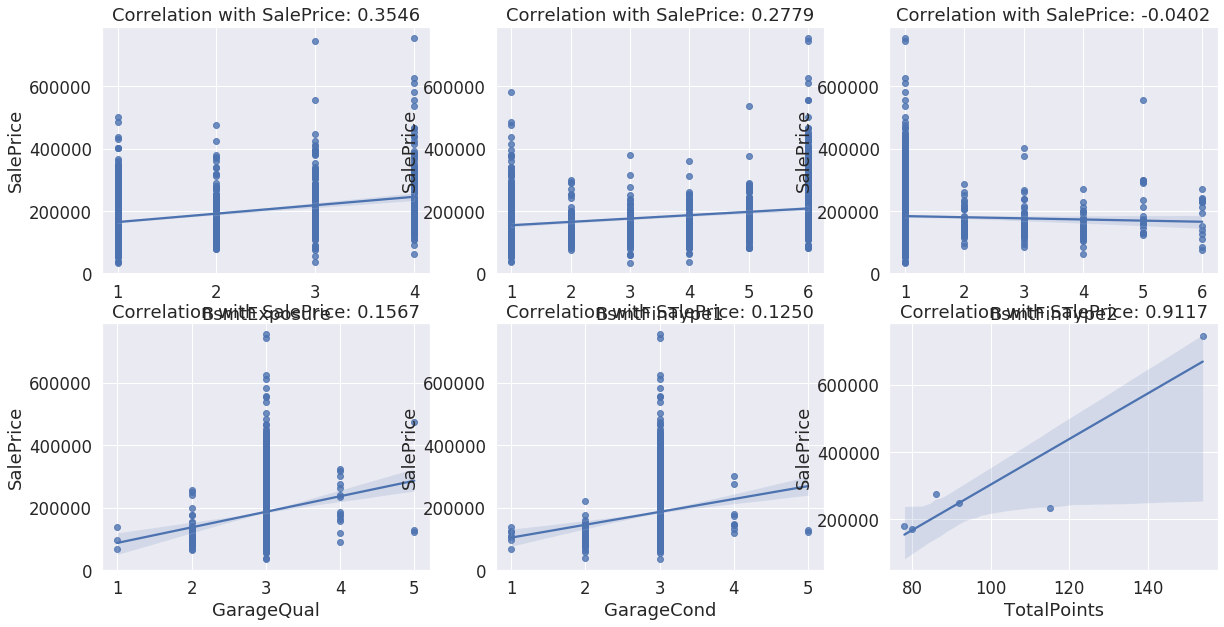

In [0]:
fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(231); sns.regplot(x='BsmtExposure', y='SalePrice', data=train_sample)
plt.title('Correlation with SalePrice: {:6.4f}'.format(train_sample.BsmtExposure.corr(train_sample['SalePrice'])))

fig2 = fig.add_subplot(232); sns.regplot(x='BsmtFinType1', y='SalePrice', data=train_sample);
plt.title('Correlation with SalePrice: {:6.4f}'.format(train_sample.BsmtFinType1.corr(train_sample['SalePrice'])))

fig3 = fig.add_subplot(233); sns.regplot(x='BsmtFinType2', y='SalePrice', data=train_sample)
plt.title('Correlation with SalePrice: {:6.4f}'.format(train_sample.BsmtFinType2.corr(train_sample['SalePrice'])))

fig4 = fig.add_subplot(234); sns.regplot(x='GarageQual', y='SalePrice', data=train_sample)
plt.title('Correlation with SalePrice: {:6.4f}'.format(train_sample.GarageQual.corr(train_sample['SalePrice'])))

fig5 = fig.add_subplot(235); sns.regplot(x='GarageCond', y='SalePrice', data=train_sample)
plt.title('Correlation with SalePrice: {:6.4f}'.format(train_sample.GarageCond.corr(train_sample['SalePrice'])))

fig6 = fig.add_subplot(236); sns.regplot(x='TotalPoints', y='SalePrice', data=train_sample)
plt.title('Correlation with SalePrice: {:6.4f}'.format(train_sample.TotalPoints.corr(train_sample['SalePrice'])))
plt.show()

###1.4 Chi-square Test 

In [0]:
df_onehot.head()

,FV,RH,RL,RM,Pave,No Alley,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,...,Mix,SBrkr,Maj2,Min1,Min2,Mod,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage,No Garage,RFn,Unf,P,Y,GdWo,MnPrv,MnWw,No Fence,No Features,Othr,Shed,TenC,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,1,No Alley,4,Lvl,AllPub,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,17,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,4,3,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,NaN,Attchd,17.0,2.0,2,548,3.0,3.0,3,0,61,0,0,0,0,NaN,NaN,No Features,0,2,12,WD,Normal,208500
1,20,RL,80.0,9600,1,No Alley,4,Lvl,AllPub,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,8,44,44,Gable,CompShg,MetalSd,MetalSd,None,0,3,3,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3.0,Attchd,44.0,2.0,2,460,3.0,3.0,3,298,0,0,0,0,0,NaN,NaN,No Features,0,5,13,WD,Normal,181500
2,60,RL,68.0,11250,1,No Alley,3,Lvl,AllPub,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,19,18,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,4,3,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3.0,Attchd,19.0,2.0,2,608,3.0,3.0,3,0,42,0,0,0,0,NaN,NaN,No Features,0,9,12,WD,Normal,223500
3,70,RL,60.0,9550,1,No Alley,3,Lvl,AllPub,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,105,50,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,3,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4.0,Detchd,22.0,1.0,3,642,3.0,3.0,3,0,35,272,0,0,0,NaN,NaN,No Features,0,2,14,WD,Abnorml,140000
4,60,RL,84.0,14260,1,No Alley,3,Lvl,AllPub,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,8,5,20,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,4,3,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3.0,Attchd,20.0,2.0,3,836,3.0,3.0,3,192,84,0,0,0,0,NaN,NaN,No Features,0,12,12,WD,Normal,250000


In [0]:
categorical_features = ('MSZoning','Street','Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl', 
        'Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','Foundation', 'GarageType', 'PavedDrive','Fence', 'MiscFeature', 'MiscFeature', 'SaleType','SaleCondition')

In [0]:
categorical_features = []
for col in df.columns.values:
    if df[col].dtype == 'object':
        categorical_features.append(col)

categorical_features.remove('MasVnrArea')

In [0]:
df_cat = df[categorical_features]

In [0]:
df_cat.head()

,MSZoning,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition
0,RL,No Alley,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal
1,RL,No Alley,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,No Features,WD,Normal
2,RL,No Alley,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal
3,RL,No Alley,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,No Features,WD,Abnorml
4,RL,No Alley,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal


In [0]:
df_SalePrice = df['SalePrice']
df_SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1458, dtype: int64

In [0]:
df_SalePrice = pd.qcut(df_SalePrice, 4, labels=["low", "middle1", "middle2", "high"])


In [0]:
df_SalePrice

0       middle2
1       middle2
2          high
3       middle1
4          high
         ...   
1455    middle2
1456    middle2
1457       high
1458    middle1
1459    middle1
Name: SalePrice, Length: 1458, dtype: category
Categories (4, object): [low < middle1 < middle2 < high]

In [0]:
df_cat = df_cat.join(df_SalePrice)
df_cat.head()

,MSZoning,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,No Alley,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal,middle2
1,RL,No Alley,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,No Features,WD,Normal,middle2
2,RL,No Alley,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal,high
3,RL,No Alley,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,No Features,WD,Abnorml,middle1
4,RL,No Alley,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal,high


In [0]:
from matplotlib import rc
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

In [0]:
def association (col):
  
  # Make Crosstab and return p-value from the chi-square test
  ct = pd.crosstab(df_cat[col], df_cat['SalePrice'], margins = True)
  chi2, p, dof, ex = chi2_contingency(ct)
  print(col + ' v.s. Price'+ '     '+"p-value: "+"{0:.4f}".format(round(p,4)))
  return p

In [0]:
df_cat.columns

Index(['MSZoning', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'GarageType', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [0]:
df_cat_rank = [ 'Utilities']

In [0]:
df_cat = df_cat.drop(df_cat_rank, axis = 1)

In [0]:
df_cat

,MSZoning,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,No Alley,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal,middle2
1,RL,No Alley,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,No Features,WD,Normal,middle2
2,RL,No Alley,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal,high
3,RL,No Alley,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,No Features,WD,Abnorml,middle1
4,RL,No Alley,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,No Alley,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal,middle2
1456,RL,No Alley,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,GasA,SBrkr,Attchd,No Features,WD,Normal,middle2
1457,RL,No Alley,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Stone,GasA,SBrkr,Attchd,Shed,WD,Normal,high
1458,RL,No Alley,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,CBlock,GasA,FuseA,Attchd,No Features,WD,Normal,middle1


In [0]:
# Loop through all the columns except for price_cat using the association function defined earlier
# Store the pvalues into dictionary called pvalue. Key: Column name, Value: p-value
pvalues = {}
for col in df_cat.columns.values[:-1]:
  pvalues[col] = association (col)


MSZoning v.s. Price     p-value: 0.0000
Alley v.s. Price     p-value: 0.0000
LandContour v.s. Price     p-value: 0.0001
LotConfig v.s. Price     p-value: 0.0047
Neighborhood v.s. Price     p-value: 0.0000
Condition1 v.s. Price     p-value: 0.0000
Condition2 v.s. Price     p-value: 0.5646
BldgType v.s. Price     p-value: 0.0000
HouseStyle v.s. Price     p-value: 0.0000
RoofStyle v.s. Price     p-value: 0.0000
RoofMatl v.s. Price     p-value: 0.3105
Exterior1st v.s. Price     p-value: 0.0000
Exterior2nd v.s. Price     p-value: 0.0000
MasVnrType v.s. Price     p-value: 0.0000
Foundation v.s. Price     p-value: 0.0000
Heating v.s. Price     p-value: 0.0024
Electrical v.s. Price     p-value: 0.0000
GarageType v.s. Price     p-value: 0.0000
MiscFeature v.s. Price     p-value: 0.7814
SaleType v.s. Price     p-value: 0.0000
SaleCondition v.s. Price     p-value: 0.0000


In [0]:
# Extract the categorical variables with p-value greater than 0.05
# P-value that's greater than 0.05 are insignificant

dft = { key:value for (key,value) in pvalues.items() if value > 0.05}

In [0]:
categorical_features = ('MSZoning','Street','Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl', 
        'Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','Foundation', 'GarageType', 'PavedDrive','Fence', 'MiscFeature', 'MiscFeature', 'SaleType','SaleCondition')

##2. Feature Selection: 

###2.1 Check the dependent variable - SalePrice

*   Distribution of dependent variable => Plot SalePrice Distribution & QQ - Plot (to identify substantive departures from normality, like skewness, outlier)


In [0]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

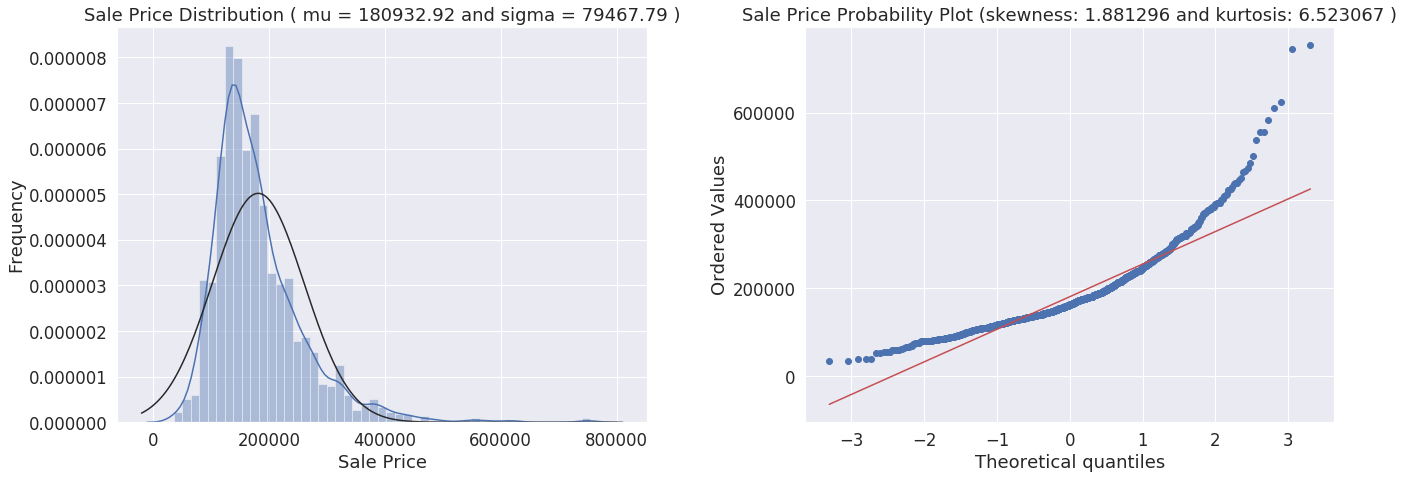

In [0]:
QQ_plot(df.SalePrice, 'Sale Price')

After measure Skewness = 1.8 & Kurtosis = 6.5

*   Sales Price distribution is skewed
*   From the Probability Plot, Sales Price also does not align with the diagonal red line which represent normal distribution => a skewed right => lack of symmetry => long relative to the left tail

*   Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution
*   with 6.5 of positive kurtosis Sales Price are definitely heavy-tailed and has some outliers - data sets with high kurtosis tend to have heavy tails, or outliers






In [0]:
# use the numpy fuction log1p which applies log(1+x) to all elements of the column
df.SalePrice = np.log1p(df.SalePrice)

QQ_plot(df.SalePrice, 'Log1P of Sales Price')

###2.2 Feature Important

In [0]:
# Divide variables:
# Numerical variables
train_num_df= df.select_dtypes(include=['int','float']).columns
# Categorical variables
train_cat_df = df_onehot

In [0]:
#Create a new train
train_df = df #because there are no correlation between variables, prameters are suitable
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,1,No Alley,4,Lvl,AllPub,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,17,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,4,3,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,NaN,Attchd,17.0,2.0,2,548,3.0,3.0,3,0,61,0,0,0,0,NaN,NaN,No Features,0,2,12,WD,Normal,208500
1,20,RL,80.0,9600,1,No Alley,4,Lvl,AllPub,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,8,44,44,Gable,CompShg,MetalSd,MetalSd,None,0,3,3,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3.0,Attchd,44.0,2.0,2,460,3.0,3.0,3,298,0,0,0,0,0,NaN,NaN,No Features,0,5,13,WD,Normal,181500
2,60,RL,68.0,11250,1,No Alley,3,Lvl,AllPub,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,19,18,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,4,3,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3.0,Attchd,19.0,2.0,2,608,3.0,3.0,3,0,42,0,0,0,0,NaN,NaN,No Features,0,9,12,WD,Normal,223500
3,70,RL,60.0,9550,1,No Alley,3,Lvl,AllPub,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,105,50,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,3,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4.0,Detchd,22.0,1.0,3,642,3.0,3.0,3,0,35,272,0,0,0,NaN,NaN,No Features,0,2,14,WD,Abnorml,140000
4,60,RL,84.0,14260,1,No Alley,3,Lvl,AllPub,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,8,5,20,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,4,3,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3.0,Attchd,20.0,2.0,3,836,3.0,3.0,3,192,84,0,0,0,0,NaN,NaN,No Features,0,12,12,WD,Normal,250000


In [0]:
Label_Var = df.SalePrice

In [0]:
df_cat.head()

,MSZoning,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,No Alley,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal,middle2
1,RL,No Alley,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,No Features,WD,Normal,middle2
2,RL,No Alley,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal,high
3,RL,No Alley,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,No Features,WD,Abnorml,middle1
4,RL,No Alley,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,No Features,WD,Normal,high


#Part III. BUILDING MODELS

In [0]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [0]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

##2. Training/ Test Spliting:

In [0]:
y_train = (df.SalePrice[df.SalePrice>0].reset_index(drop=True, inplace=False))

# Data with Polynomials
train = df.loc[(df.SalePrice>0), cols].reset_index(drop=True, inplace=False)
test = df.loc[(df.SalePrice==0), cols].reset_index(drop=True, inplace=False)

In [0]:
from sklearn.preprocessing import RobustScaler # set up package

scale = RobustScaler()
# Data without Polynomials
df = pd.DataFrame(scale.fit_transform(train[cols]), columns= cols)

#### Prepare for prediction

In [0]:
#Target variable y
y = df.SalePrice

In [0]:
#Remove from data train
del df['SalePrice']

In [0]:
df.head(10)

In [0]:
#values in X and Y
X = df.values
Y = y.values

In [0]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

##3. Linear regression

In [0]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [0]:
#Fit the model
model.fit(X_train, y_train)

In [0]:
print("Predict value " + str(model.predict([X_test[142]])))

In [0]:
#Score/Accuracy
print("Accurated score ->  ", model.score(X_test, y_test)*100)

###3.1 RandomForestRegression

In [0]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [0]:
#Fit
model.fit(X_train, y_train)

In [0]:
#Score/Accuracy
print("Accurated score ->  ", model.score(X_test, y_test)*100)

###3.2 Gradient descent approach (Optional)


In [0]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [0]:
GBR.fit(X_train, y_train)

In [0]:
print("Accurated score -> ", GBR.score(X_test, y_test)*100)

In [0]:
print("Predict value " + str(model.predict([X_test[1]])))

##4. Tree-Based Model